In [85]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
import sunpy.map
import matplotlib.pyplot as plt

In [32]:
# Transparency colors definition:
torange = {'red' :  ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'green': ((0.0, 0.0, 0.498), 
                    (1.0, 0.498, 0.0)), 
        'blue':  ((0.0, 0.0, 0.055), 
                    (1.0, 0.055, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 1.0, 0.0))}

tblue = {'red' :  ((0.0, 0.0, 0.125), 
                    (1.0, 0.125, 0.0)), 
        'green': ((0.0, 0.0, 0.467), 
                    (1.0, 0.467, 0.0)), 
        'blue':  ((0.0, 0.0, 0.706), 
                    (1.0, 0.706, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}

tblue  = LinearSegmentedColormap('tblue', tblue) 
torange= LinearSegmentedColormap('torange', torange) 

In [51]:
file094 = 'f0094_launch3.fits'
file171 = 'f0171_launch3.fits'
file211 = 'f0211_launch3.fits'
launchAIA094 = sunpy.map.Map(file094)
launchAIA171 = sunpy.map.Map(file171)
launchAIA211 = sunpy.map.Map(file211)

TempMap = sunpy.map.Map(file171)
TempMap.data[:] = launchAIA094.data[:] + launchAIA211.data[:]/-120 + launchAIA171.data[:]/-450

In [101]:
Ftarget = {'T1': {'xy':(429.9, 39.5),   'col':'black'},
           'T2': {'xy':(-0.1, 650.7), 'col':'black'},
           'T3': {'xy':(-650.8, 39.6),  'col':'black'},
           'T4 pos0': {'xy':(429.8, 39.6),   'col':'black'},
           'T4 pos1': {'xy':(550.8, 39.6),  'col':'black'}
          }

/Users/Kamilobu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


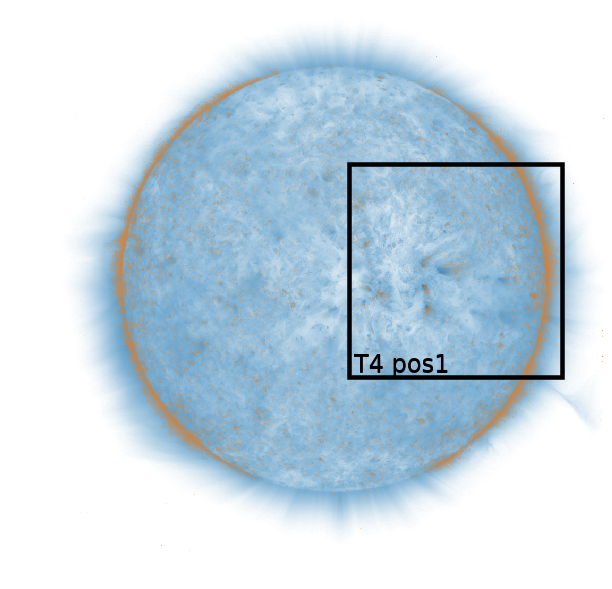

In [105]:
key = 'T4 pos1'
fig, ax = plt.subplots(figsize=(10,10));
ax.axis('off')
launchAIA171.plot(vmin=10,cmap=tblue,axes=ax,title='')
TempMap.plot(vmin=.9,cmap=torange,axes=ax,title='')
x,y = Ftarget[key]['xy']
rect = patches.Rectangle((x-480,y-480),960,960,linewidth=4.5,edgecolor=Ftarget[key]['col'],facecolor='none')
ax.add_patch(rect)
ax.text(x-457, y-462, key, fontsize=24,color='black')
ax.text(x-460, y-460, key, fontsize=24,color=Ftarget[key]['col'])
fig.show()
fig.savefig(f'{key}.png',transparent=True,dpi=100,bbox_inches=None)